In [44]:
from PIL import Image 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import splitfolders
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [45]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [46]:
input_folder= "/Users/yamacozgulbas/Desktop/Robot/Folder/myImages2/"
output_folder="/Users/yamacozgulbas/Desktop/Robot/Folder/Output/"
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=( .6, .2, .2))

Copying files: 1197 files [00:01, 998.59 files/s] 


In [47]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [48]:
train_dataset = train.flow_from_directory('/Users/yamacozgulbas/Desktop/Robot/Folder/Output/train/',target_size=(200,200),batch_size = 32, class_mode = 'categorical')


validation_dataset = validation.flow_from_directory('/Users/yamacozgulbas/Desktop/Robot/Folder/Output/val/',target_size=(200,200),batch_size = 3, class_mode = 'categorical')




Found 716 images belonging to 5 classes.
Found 238 images belonging to 5 classes.


In [49]:
train_dataset.class_indices

{'bath': 0, 'bed': 1, 'kitchen': 2, 'living': 3, 'toilets': 4}

In [50]:
model =tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='softmax')
                                  ])


In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [57]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs=20,
                     validation_data=validation_dataset)

Epoch 1/20
3/3 [==============================] - 3s 971ms/step - loss: 0.8396 - accuracy: 0.8562 - val_loss: 1.3619 - val_accuracy: 0.7975
Epoch 2/20
3/3 [==============================] - 3s 860ms/step - loss: 0.9630 - accuracy: 0.8688 - val_loss: 1.2327 - val_accuracy: 0.8126
Epoch 3/20
3/3 [==============================] - 3s 896ms/step - loss: 0.8845 - accuracy: 0.8421 - val_loss: 1.1558 - val_accuracy: 0.8244
Epoch 4/20
3/3 [==============================] - 3s 863ms/step - loss: 0.9066 - accuracy: 0.8625 - val_loss: 1.1009 - val_accuracy: 0.8151
Epoch 5/20
3/3 [==============================] - 3s 858ms/step - loss: 0.8766 - accuracy: 0.8479 - val_loss: 1.0367 - val_accuracy: 0.8303
Epoch 6/20
3/3 [==============================] - 3s 868ms/step - loss: 0.7127 - accuracy: 0.8875 - val_loss: 1.1211 - val_accuracy: 0.8193
Epoch 7/20
3/3 [==============================] - 3s 869ms/step - loss: 0.6421 - accuracy: 0.8875 - val_loss: 1.3166 - val_accuracy: 0.8118
Epoch 8/20
3/3 [====

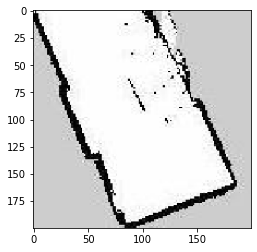

living room


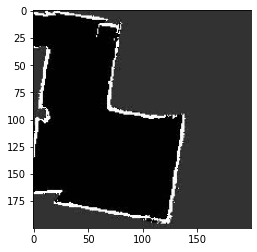

living room


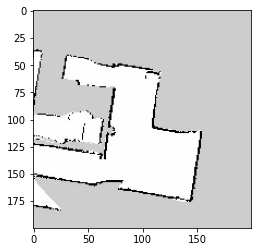

living room


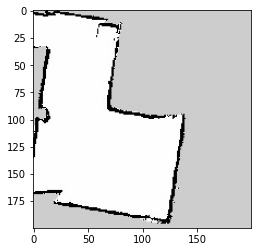

bedroom


In [60]:
dir_path ='/Users/yamacozgulbas/Desktop/Robot/K/'


for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images =np.vstack([X])
    val = model.predict(images)
    if val[0][0] > val[0][1] and val[0][0] > val[0][2] and val[0][0]>val[0][3] and val[0][0]>val[0][4]:
        print("bathroom")
    elif val[0][1] > val[0][0] and val[0][1] > val[0][2] and val[0][1]>val[0][3] and val[0][1]>val[0][4]:
        print("bedroom")
    elif val[0][2] > val[0][1] and val[0][2] > val[0][0] and val[0][2]>val[0][3] and val[0][2]>val[0][4]:
        print("kitchen")
    elif val[0][3] > val[0][1] and val[0][3] > val[0][2] and val[0][3]>val[0][0] and val[0][3]>val[0][4]:
        print("living room")
    elif val[0][4] > val[0][1] and val[0][4] > val[0][2] and val[0][4]>val[0][3] and val[0][4]>val[0][0]:
        print("toilets")

In [17]:
dir_path ='/Users/yamacozgulbas/Desktop/Robot/Folder/Output/A'